<a href="https://colab.research.google.com/github/jasonwashburn/notebooks/blob/main/Himawari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [21]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Himawari 8

### Download data files
NCI THREDDS Data Server: http://dapds00.nci.org.au/thredds/catalog/rr5/satellite/obs/himawari8/FLDK/catalog.html

In [1]:
!curl http://dapds00.nci.org.au/thredds/fileServer/rr5/satellite/obs/himawari8/FLDK/2021/06/01/0000/20210601000000-P1S-ABOM_OBS_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc --output 20210601000000-P1S-ABOM_OBS_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc 
!curl http://dapds00.nci.org.au/thredds/fileServer/rr5/satellite/obs/himawari8/FLDK/2021/06/01/0000/20210601000000-P1S-ABOM_OBS_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc --output 20210601000000-P1S-ABOM_OBS_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc 
!curl http://dapds00.nci.org.au/thredds/fileServer/rr5/satellite/obs/himawari8/FLDK/2021/06/01/0000/20210601000000-P1S-ABOM_OBS_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc --output 20210601000000-P1S-ABOM_OBS_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.3M  100 25.3M    0     0  5845k      0  0:00:04  0:00:04 --:--:-- 5863k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.3M  100 25.3M    0     0  8881k      0  0:00:02  0:00:02 --:--:-- 8878k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26.0M  100 26.0M    0     0  7655k      0  0:00:03  0:00:03 --:--:-- 7653k


In [13]:
!ls -l

total 78600
-rw-r--r-- 1 root root 26587673 Jul  4 12:02 20210601000000-P1S-ABOM_OBS_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
-rw-r--r-- 1 root root 26620192 Jul  4 12:02 20210601000000-P1S-ABOM_OBS_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
-rw-r--r-- 1 root root 27263940 Jul  4 12:02 20210601000000-P1S-ABOM_OBS_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc
drwxr-xr-x 1 root root     4096 Jun 15 13:37 sample_data


In [14]:
!pwd

/content


### Open dataset

In [4]:
# Data Paths
h8b1_path = "/content/20210601000000-P1S-ABOM_OBS_B01-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc"
h8b2_path = "/content/20210601000000-P1S-ABOM_OBS_B02-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc"
h8b3_path = "/content/20210601000000-P1S-ABOM_OBS_B03-PRJ_GEOS141_2000-HIMAWARI8-AHI.nc"

# Open Data
h8b1 = Dataset(h8b1_path)
h8b2 = Dataset(h8b2_path)
h8b3 = Dataset(h8b3_path)

### Take a look at the file contents

In [5]:
for item in h8b1.dimensions:
    print(f"dimensions: {h8b1.dimensions[item].name}, size: {h8b1.dimensions[item].size}\n")

vars = h8b1.variables.keys()
for item in vars:
    print(f"Variable:\t{item}")
    print(f"Dimensions:\t{h8b1[item].dimensions}")
    print(f"Shape:\t{h8b1[item].shape}\n")

dimensions: time, size: 1

dimensions: y, size: 5500

dimensions: x, size: 5500

Variable:	time
Dimensions:	('time',)
Shape:	(1,)

Variable:	y
Dimensions:	('y',)
Shape:	(5500,)

Variable:	x
Dimensions:	('x',)
Shape:	(5500,)

Variable:	geostationary
Dimensions:	()
Shape:	()

Variable:	scan_line_time
Dimensions:	('y',)
Shape:	(5500,)

Variable:	channel_0001_scaled_radiance
Dimensions:	('time', 'y', 'x')
Shape:	(1, 5500, 5500)



### Extract and plot global data

In [6]:
b1 = h8b1.variables['channel_0001_scaled_radiance'][0,:,:]
b2 = h8b2.variables['channel_0002_scaled_radiance'][0,:,:]
b3 = h8b3.variables['channel_0003_scaled_radiance'][0,:,:]

x = h8b1.variables['x'][:]
y = h8b1.variables['y'][:]

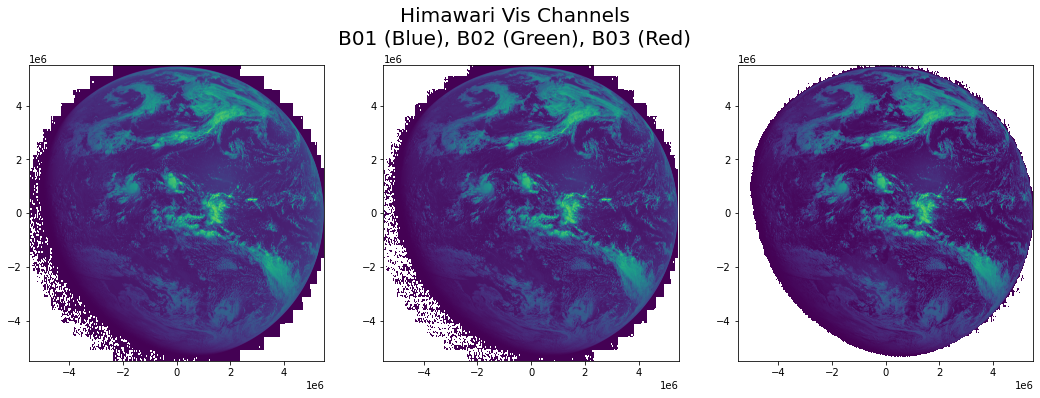

In [20]:
fig = plt.figure(figsize = (18, 6))
fig.suptitle('Himawari Vis Channels\nB01 (Blue), B02 (Green), B03 (Red)', fontsize=20)

ax0 = fig.add_subplot(131)
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

ax0.imshow(b1, extent=[x[0], x[-1], y[-1], y[0]])
ax1.imshow(b2, extent=[x[0], x[-1], y[-1], y[0]])
ax2.imshow(b3, extent=[x[0], x[-1], y[-1], y[0]])

### Create RGB Image from Bands 1-3

In [25]:
vmin = 0
vmax = .5
B1 = b1.clip(vmin, vmax) / vmax * 255
B2 = b2.clip(vmin, vmax) / vmax * 255
B3 = b3.clip(vmin, vmax) / vmax * 255

rgb = np.stack((B3, B2, B1), axis=2).astype('uint8')

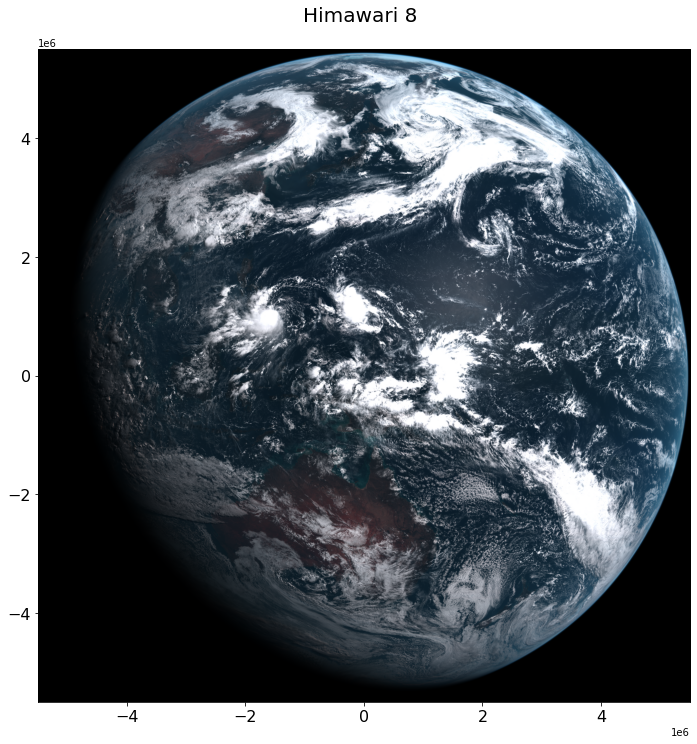

In [27]:
plt.figure(figsize=(12, 12))
plt.imshow(rgb, extent=[x[0], x[-1], y[-1], y[0]])

plt.title('Himawari 8 \n', fontsize=20)

plt.tick_params(labelsize=16)